# Import thư viện

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# Đọc dữ liệu

In [ ]:
data = pd.read_csv("patient-characteristics-survey-pcs-2017-1.csv")

In [ ]:
data.sample(5)

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,...,Unknown Insurance Coverage,No Insurance,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
27945,2017,OUTPATIENT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,OTHER LIVING SITUATION,...,NO,NO,YES,YES,NO,NO,NO,NO,NO,141
143529,2017,OUTPATIENT,NEW YORK CITY REGION,CHILD,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",OTHER,PRIVATE RESIDENCE,...,NO,NO,YES,NO,NO,NO,NO,NO,NO,104
108222,2017,RESIDENTIAL,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,NO,YES,NO,NO,NO,NO,NO,NO,141
27161,2017,OUTPATIENT,LONG ISLAND REGION,ADULT,MALE,"NO, NOT TRANSGENDER",CLIENT DID NOT ANSWER,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,NO,YES,YES,YES,NO,NO,NO,NO,119
51183,2017,OUTPATIENT,NEW YORK CITY REGION,CHILD,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,NO,YES,NO,NO,NO,NO,NO,NO,104


In [ ]:
for col in ["Program Category", "Stroke","Mental Illness","Alzheimer or Dementia"]:
    print(col,data[col].value_counts())

Program Category OUTPATIENT     126064
RESIDENTIAL     28734
SUPPORT         19411
INPATIENT        9282
EMERGENCY        3701
Name: Program Category, dtype: int64
Stroke NO         159830
UNKNOWN     25126
YES          2236
Name: Stroke, dtype: int64
Mental Illness YES        180346
NO           5655
UNKNOWN      1191
Name: Mental Illness, dtype: int64
Alzheimer or Dementia NO         161026
UNKNOWN     25126
YES          1040
Name: Alzheimer or Dementia, dtype: int64


In [ ]:
data.describe()

,Survey Year,Three Digit Residence Zip Code
count,187192.0,187192.000000
mean,2017.0,201.907154
std,0.0,253.530603
min,2017.0,100.000000
25%,2017.0,107.000000
50%,2017.0,114.000000
75%,2017.0,138.000000
max,2017.0,999.000000


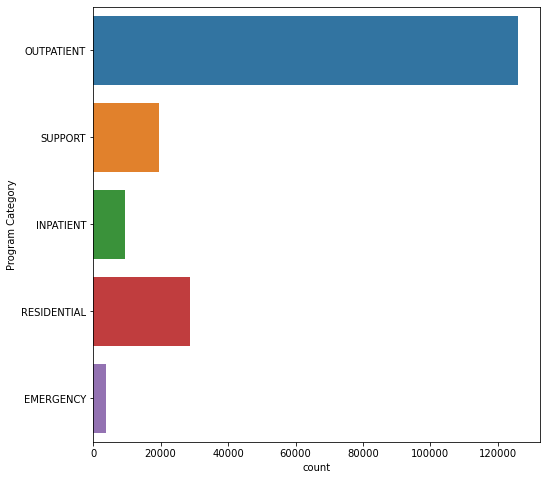

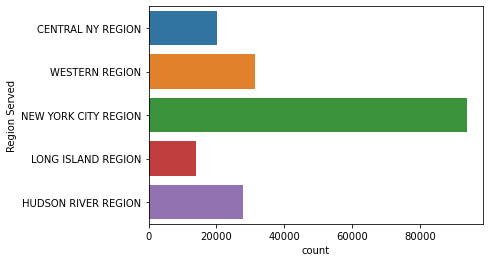

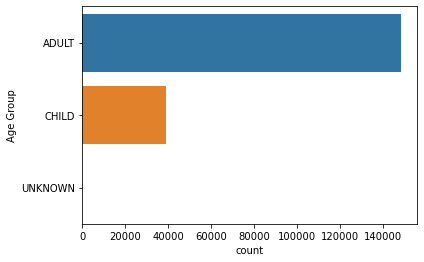

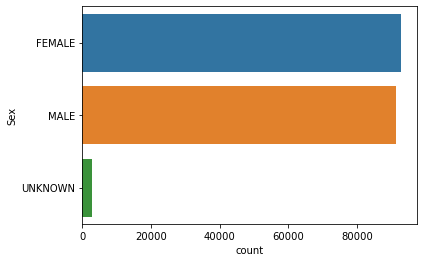

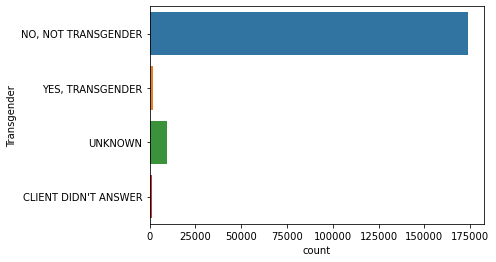

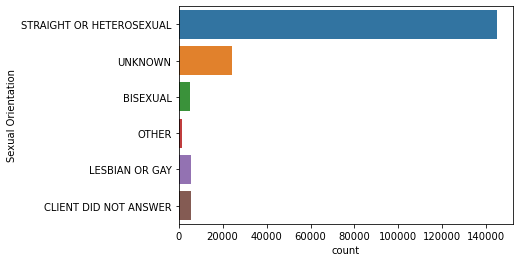

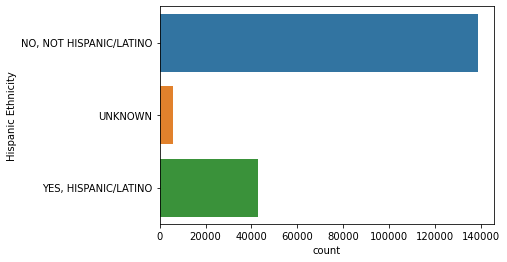

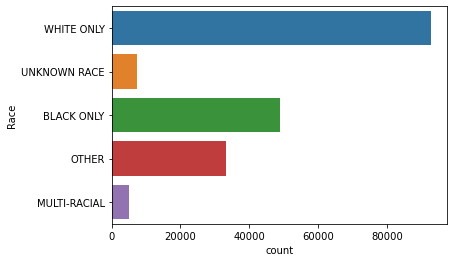

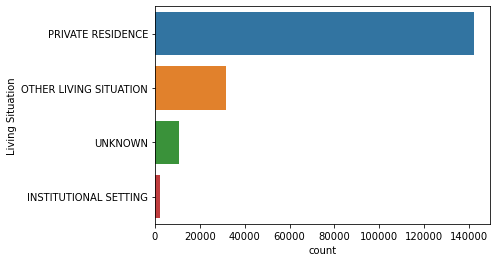

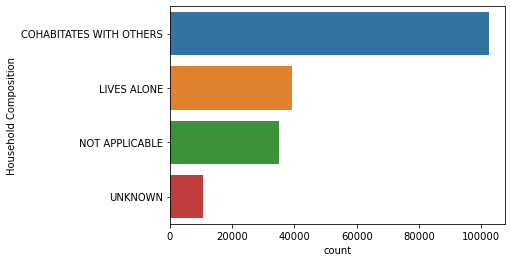

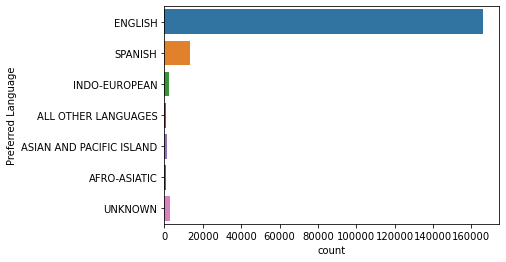

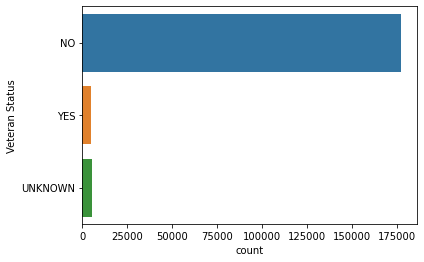

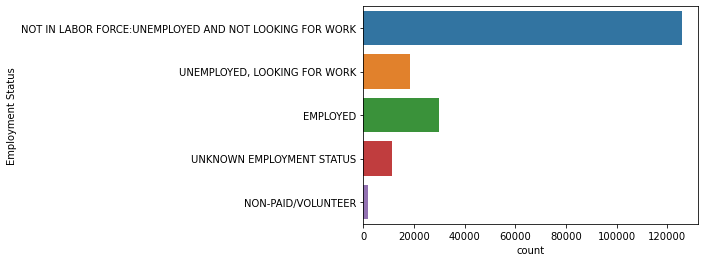

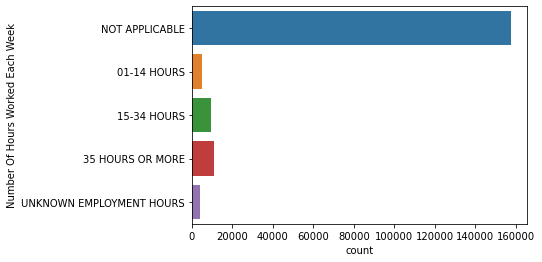

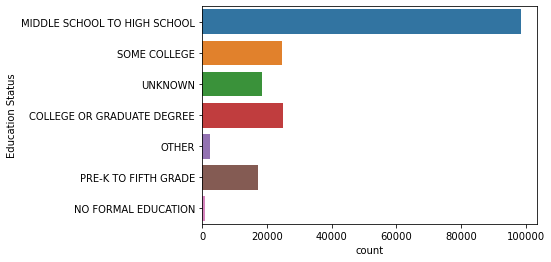

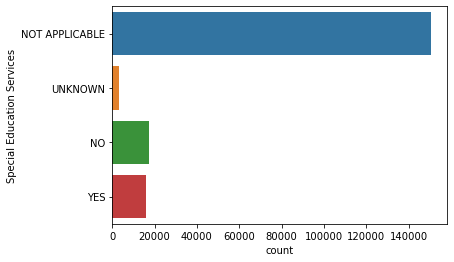

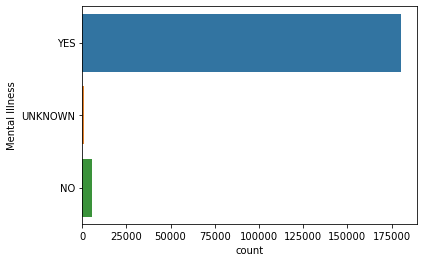

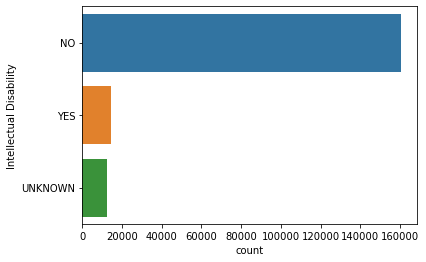

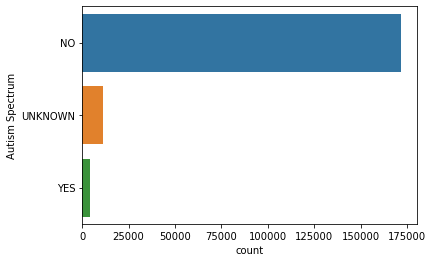

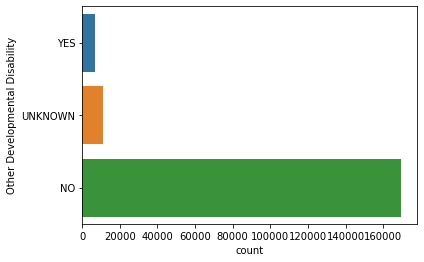

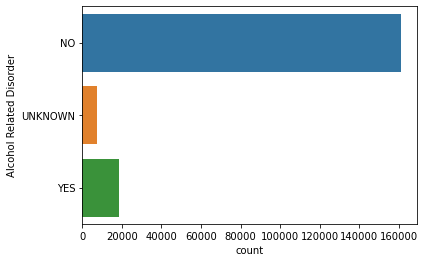

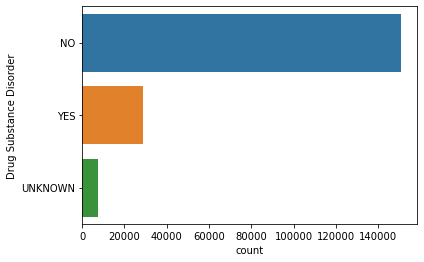

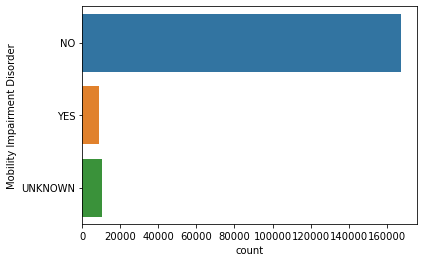

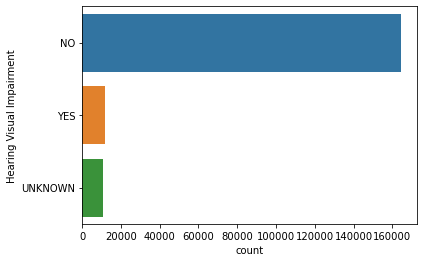

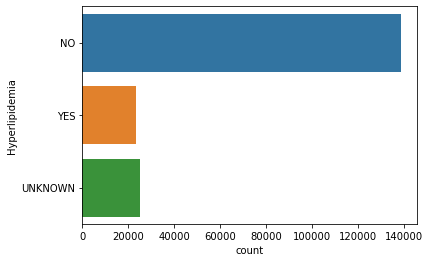

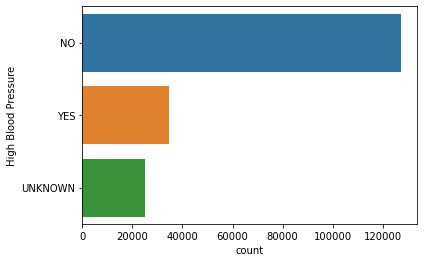

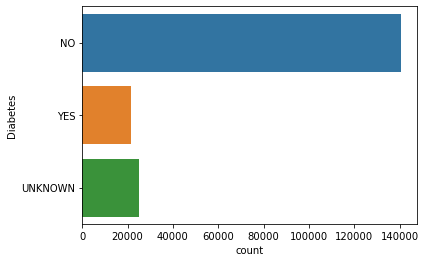

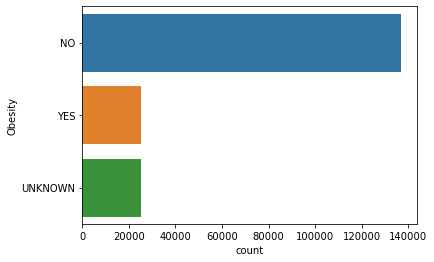

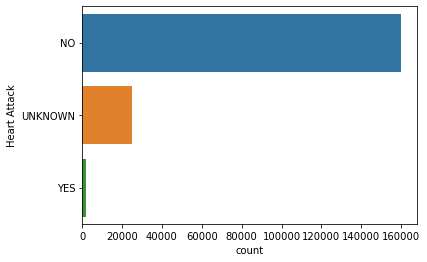

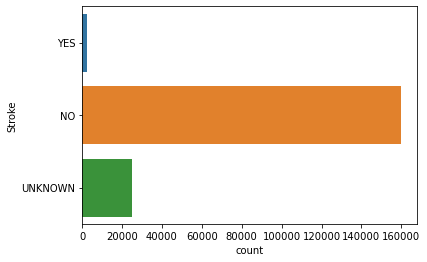

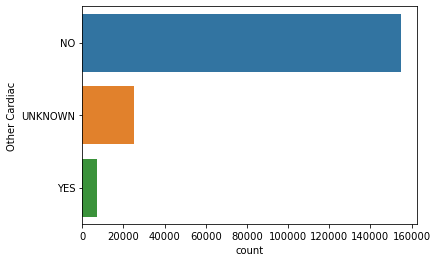

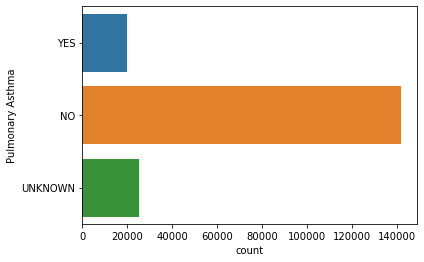

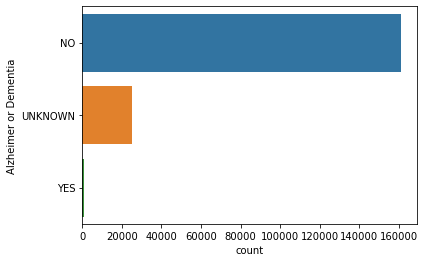

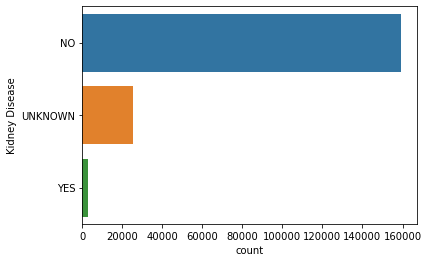

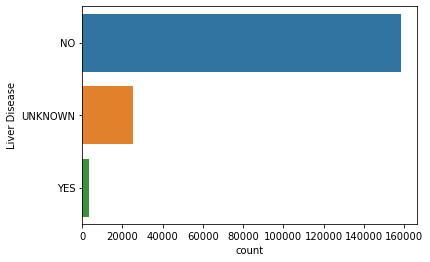

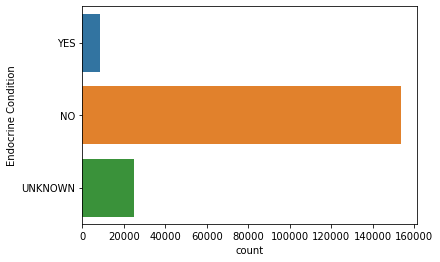

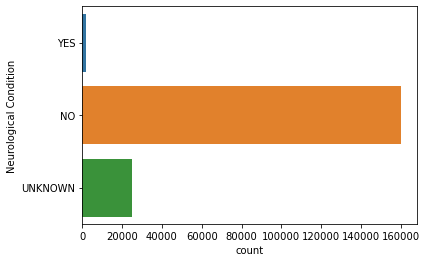

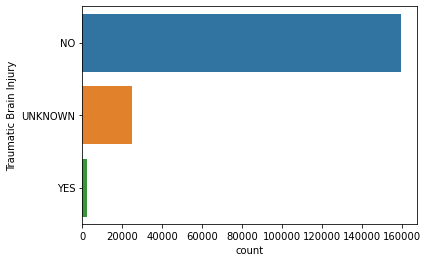

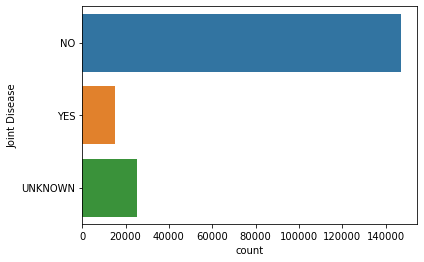

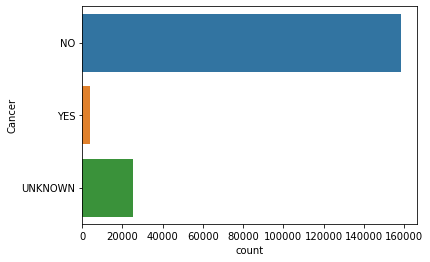

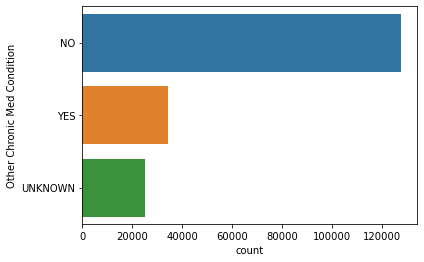

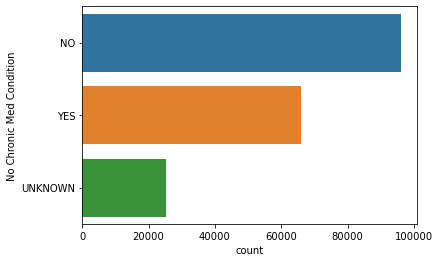

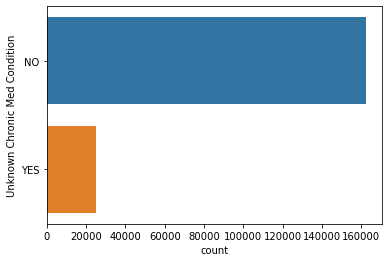

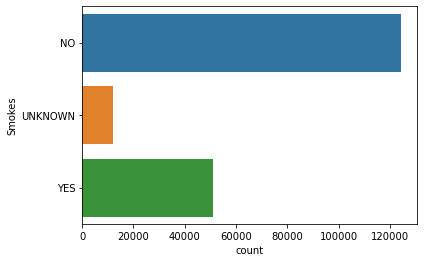

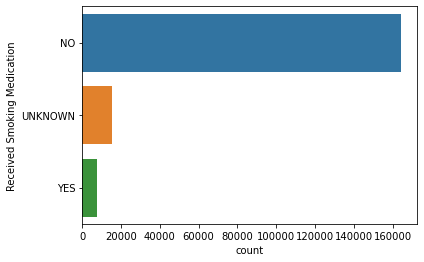

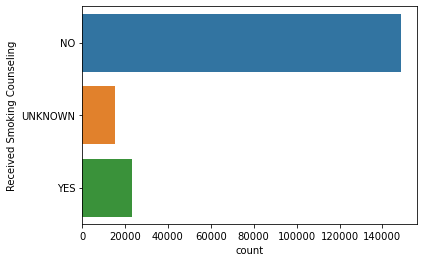

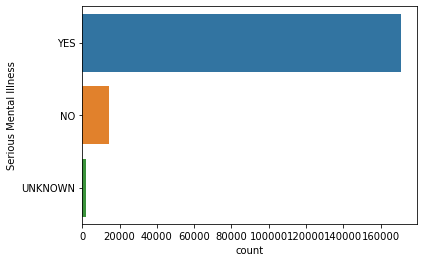

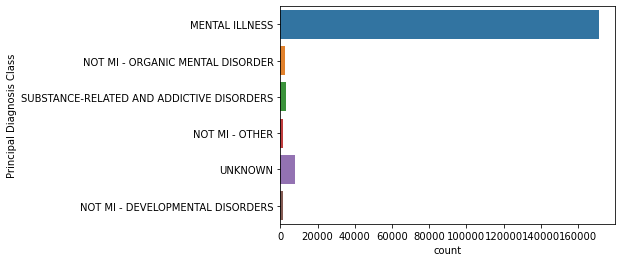

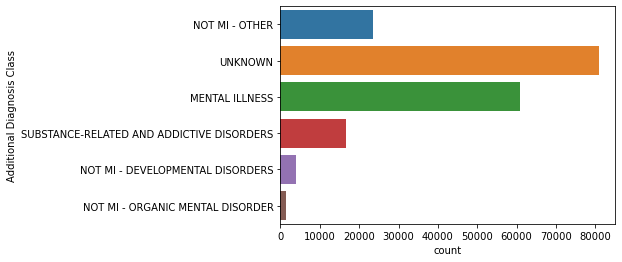

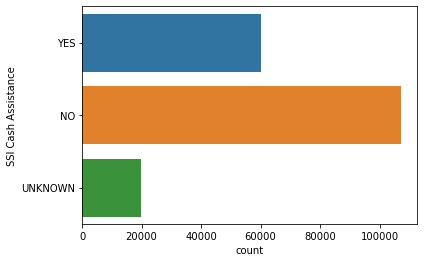

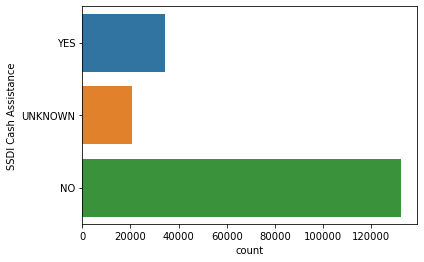

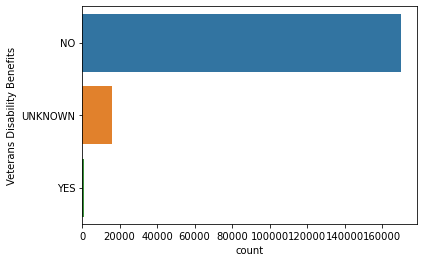

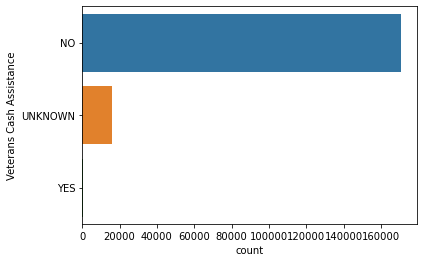

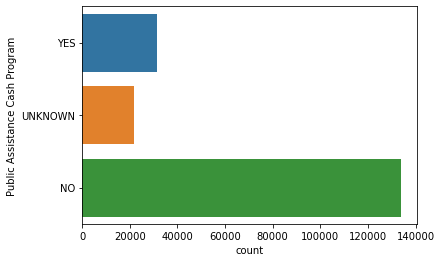

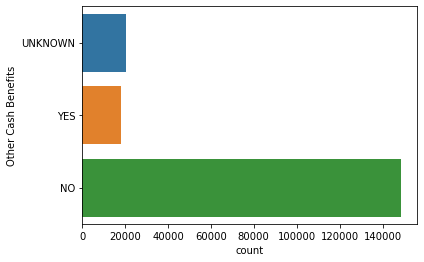

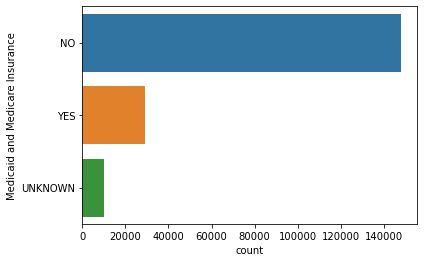

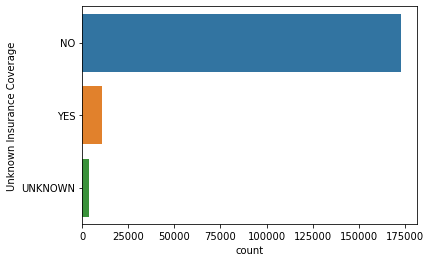

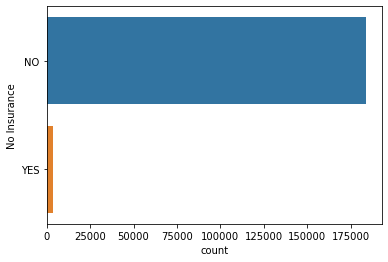

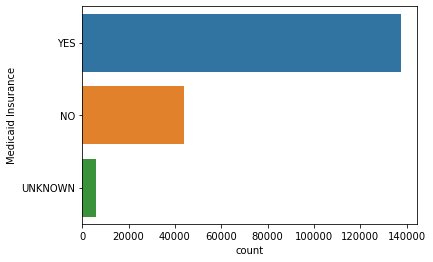

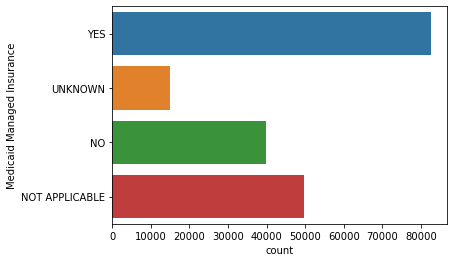

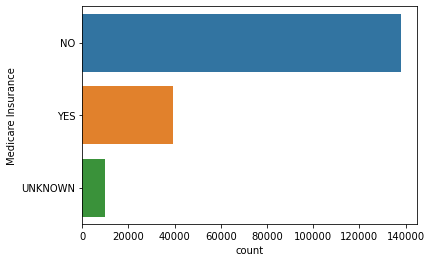

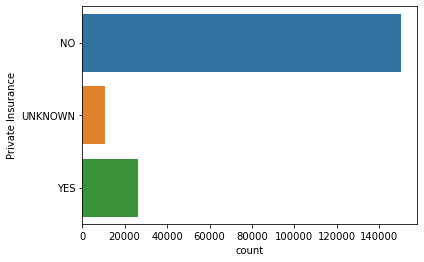

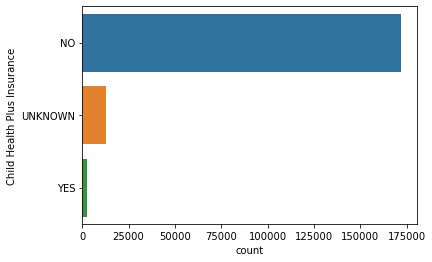

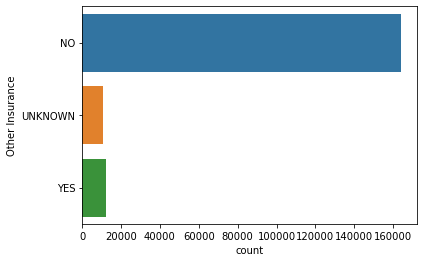

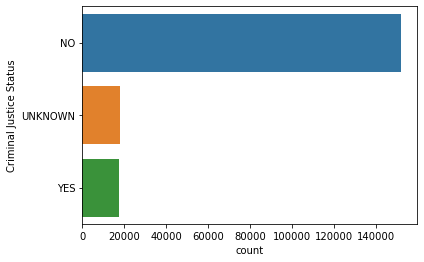

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 10:
        sns.countplot(y=col, data=data)
        plt.show()

# Tiền xử lý dữ liệu

## Thay thế các giá trị "UNKNOWN" hoặc tương tự bằng "nan"

In [ ]:
unk = ["UNKNOWN",
       "CLIENT DIDN'T ANSWER", 
       "CLIENT DID NOT ANSWER", 
       "UNKNOWN RACE", 
       "UNKNOWN EMPLOYMENT STATUS", 
       "NOT APPLICABLE", 
       "NOT APPLICABLE",
       "UNKNOWN EMPLOYMENT HOURS"]

data.replace(to_replace=unk, value=np.nan, inplace=True)

In [ ]:
pd.DataFrame({"index" : data.isnull().sum().index, "values" : data.isnull().sum().values})

,index,values
0,Survey Year,0
1,Program Category,0
2,Region Served,0
3,Age Group,33
4,Sex,2994
...,...,...
62,Private Insurance,10945
63,Child Health Plus Insurance,12789
64,Other Insurance,10675
65,Criminal Justice Status,17882


## Loại bỏ các cột có số giá trị null lớn hơn 70%

In [ ]:
for col in data.columns:
    if data[col].isnull().sum() > 0.7*len(data):
        data.drop(col, axis=1, inplace=True)

In [ ]:
data.shape

(187192, 65)

## Loại bỏ tất cả các giá trị null có trong data

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(37468, 65)

### Loại bỏ tất cả các cột chỉ tồn tại một giá trị

In [ ]:
for col in data.columns:
    if len(data[col].unique()) <= 1:
        data.drop(col, axis=1, inplace=True)

In [ ]:
data.shape

(37468, 59)

## Đổi các biến chữ thành biến số sử dụng Label encoder

In [ ]:

label_encoder = preprocessing.LabelEncoder()
for col in data.columns:
    if data[col].dtypes != "int64":
        data[col]= label_encoder.fit_transform(data[col])

## Hiển thị giá trị và số lượng giá trị trong cột "Stroke"

In [ ]:
data["Stroke"].value_counts()

0    36855
1      613
Name: Stroke, dtype: int64

## Chuyển cột "Stroke" về cuối dataframe

In [ ]:

cols = list(data.columns.values)
cols.pop(cols.index('Stroke'))
data = data[cols+['Stroke']]


In [ ]:
#data_Stroke_0 = data[(data["Stroke"] == 0)]
#data_Stroke_1 = data[(data["Stroke"] == 1)]

In [ ]:
#data = pd.concat([data_Stroke_0, data_Stroke_1])

In [ ]:
data_corr = data.corr()

In [ ]:
data.describe()

,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Household Composition,Preferred Language,...,Other Cash Benefits,Medicaid and Medicare Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code,Stroke
count,37468.000000,37468.000000,37468.000000,37468.000000,37468.000000,37468.000000,37468.000000,37468.000000,37468.000000,37468.000000,...,37468.000000,37468.000000,37468.000000,37468.000000,37468.000000,37468.000000,37468.000000,37468.000000,37468.000000,37468.000000
mean,2.273327,2.447475,0.162726,0.461300,0.010916,2.807009,0.262677,1.988230,0.335753,3.148687,...,0.089783,0.216184,0.709912,0.216184,0.031147,0.008808,0.050496,0.080362,127.773113,0.016361
std,0.660672,1.240843,0.369120,0.498507,0.103909,0.666096,0.440095,1.257129,0.472259,0.589285,...,0.285875,0.411647,0.453809,0.411647,0.173716,0.093435,0.218970,0.271856,93.236308,0.126860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104.750000,0.000000
50%,2.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,3.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,0.000000
75%,3.000000,3.000000,0.000000,1.000000,0.000000,3.000000,1.000000,3.000000,1.000000,3.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.000000,0.000000
max,4.000000,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,999.000000,1.000000


## Xem xét tổng quan data

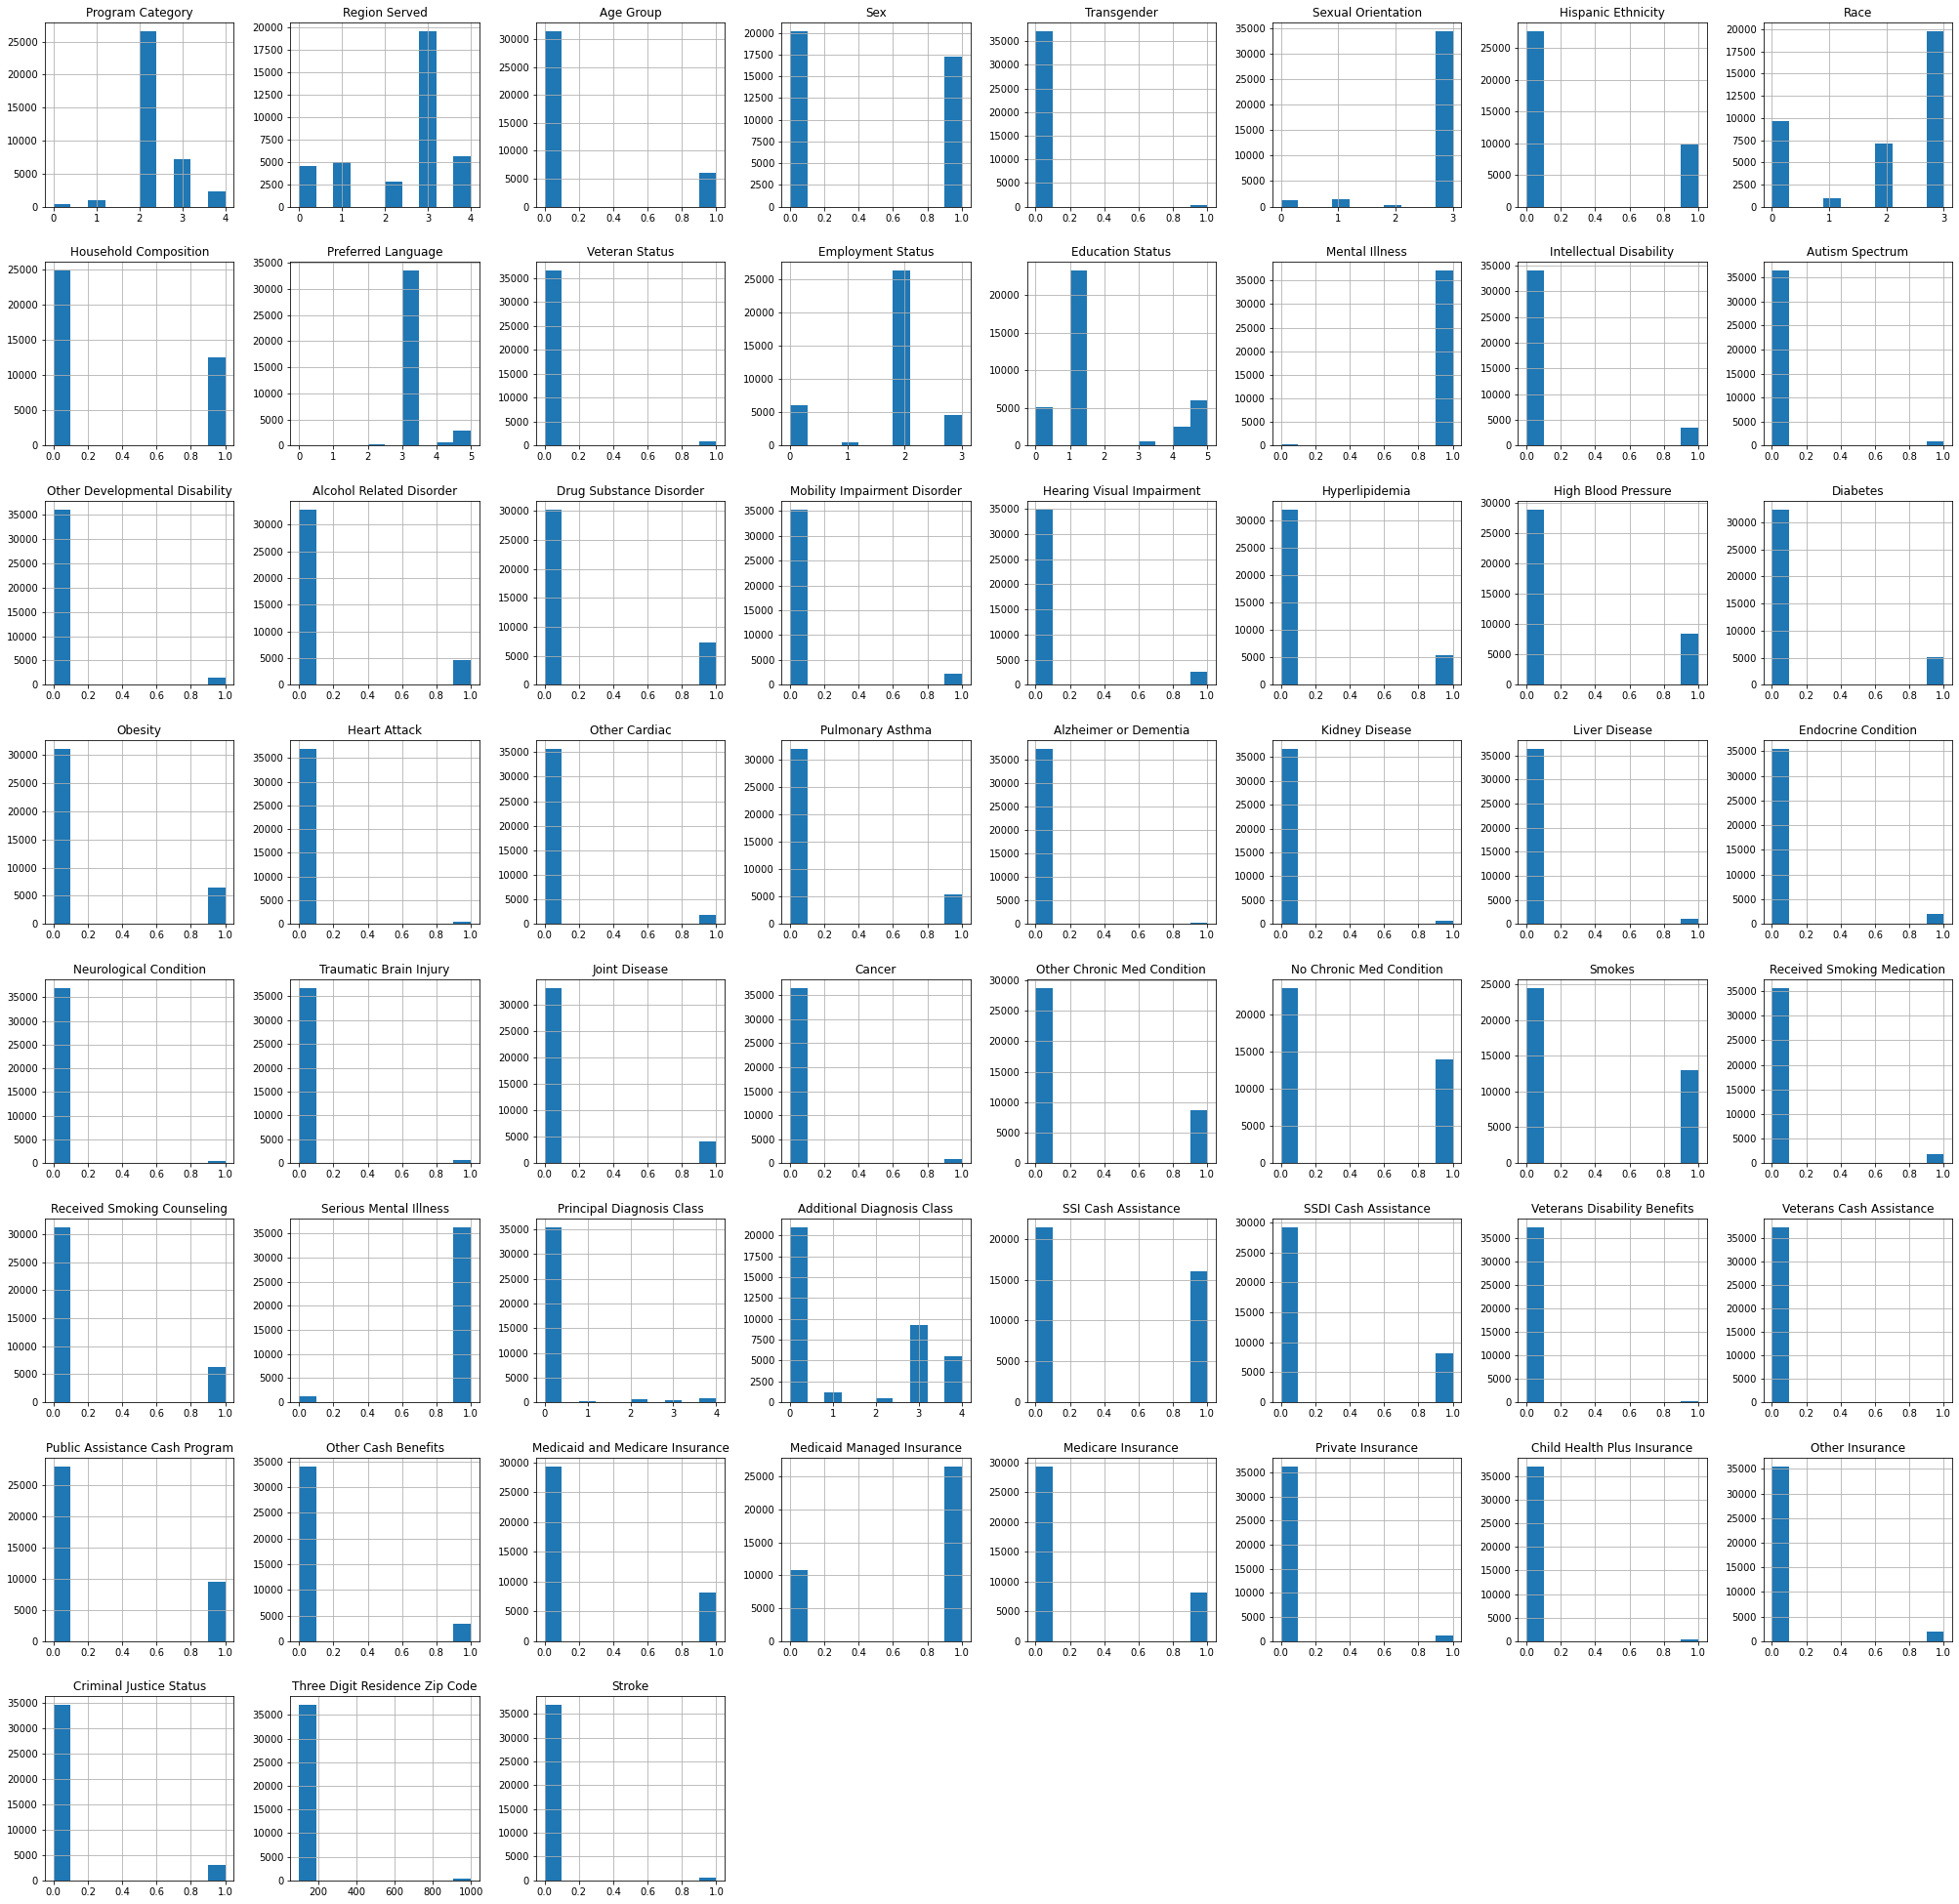

In [ ]:
data.hist(figsize=(35,35))
plt.show()

## Lấy những biến có độ tương quan với stroke lớn hơn 0.1

In [ ]:
index_higher_0_3 = data_corr[((data_corr["Stroke"] > 0.3) | (data_corr["Stroke"] < -0.3))]["Stroke"].index
len(index_higher_0_3)

1

<AxesSubplot:>

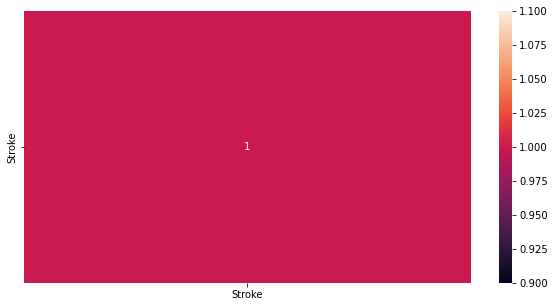

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(data[index_higher_0_3].corr(), annot=True)

In [ ]:
data_strong_correlation = data[index_higher_0_3]

## Cân bằng dữ liệu

### SMOTE

In [ ]:
X = data.drop("Stroke", axis = 1)
y = data["Stroke"]

In [ ]:
from imblearn.over_sampling import SMOTE
smt= SMOTE()
X_res_smt, y_res_smt = smt.fit_resample(X, y)

In [ ]:
y_res_smt.value_counts()

0    36855
1    36855
Name: Stroke, dtype: int64

In [ ]:
data_res_smt = X_res_smt
data_res_smt["Stroke"] = y_res_smt

In [ ]:
data_res_smt_corr = data_res_smt.corr(method="pearson")

In [ ]:
index_higher_0_3_smt = data_res_smt_corr[((data_res_smt_corr["Stroke"] >= 0.3) | (data_res_smt_corr["Stroke"] <= -0.3))]["Stroke"].index
len(index_higher_0_3_smt)

4

<AxesSubplot:>

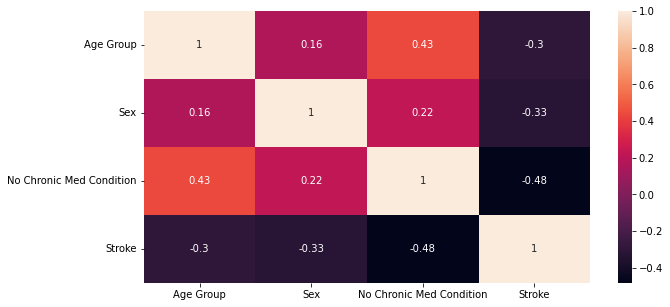

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(data_res_smt[index_higher_0_3_smt].corr(method="pearson"), annot=True)

## Train model

In [ ]:
data_model = data_res_smt[index_higher_0_3_smt]
data_model

,Age Group,Sex,No Chronic Med Condition,Stroke
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
73705,0,0,0,1
73706,0,1,0,1
73707,0,0,0,1
73708,0,0,0,1


In [ ]:
X_train_res=data_model.drop("Stroke", axis=1)
y_train_res=data_model["Stroke"]

In [ ]:
y_train_res.value_counts()

0    36855
1    36855
Name: Stroke, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.2)

In [ ]:
y_test.value_counts()

0    7393
1    7349
Name: Stroke, dtype: int64

## train Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
LoRe = LogisticRegression()



In [ ]:

LoRe.fit(X_train, y_train) 

LogisticRegression()

In [ ]:
y_pre_LoRe = LoRe.predict(X_test)

In [ ]:
print("accuracy_score: ", accuracy_score(y_test.values, y_pre_LoRe))
print("f1_score: ",f1_score(y_test.values, y_pre_LoRe))
print(classification_report(y_test.values, y_pre_LoRe))
print(confusion_matrix(y_test.values, y_pre_LoRe))

accuracy_score:  0.7518654185320852
f1_score:  0.7719451371571072
              precision    recall  f1-score   support

           0       0.81      0.66      0.73      7393
           1       0.71      0.84      0.77      7349

    accuracy                           0.75     14742
   macro avg       0.76      0.75      0.75     14742
weighted avg       0.76      0.75      0.75     14742

[[4893 2500]
 [1158 6191]]


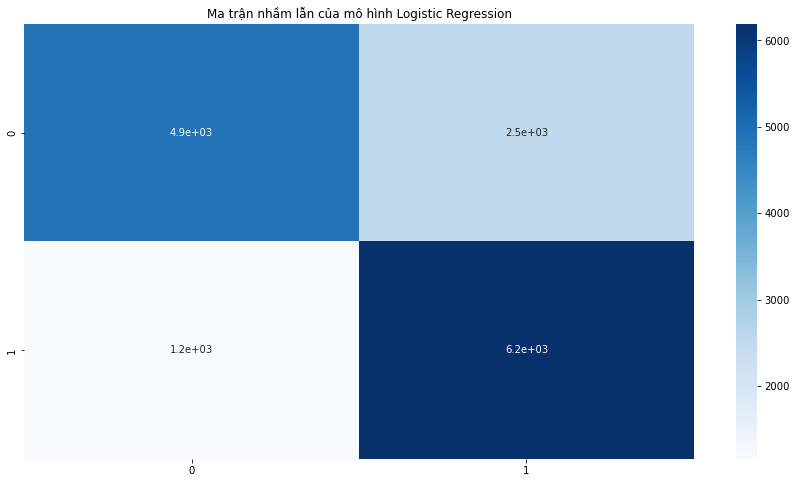

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Ma trận nhầm lẫn của mô hình Logistic Regression")
sns.heatmap(confusion_matrix(y_test.values, y_pre_LoRe), cmap="Blues", annot=True)
plt.show()

## train VSM model

In [ ]:
svc = SVC(gamma="auto")

In [ ]:
svc.fit(X_train,y_train)

SVC(gamma='auto')

In [ ]:
y_pre_SVC = svc.predict(X_test)

In [ ]:
print("accuracy_score: ", accuracy_score(y_test.values, y_pre_SVC))
print("f1_score: ",f1_score(y_test.values, y_pre_SVC))
print(classification_report(y_test.values, y_pre_SVC))
print(confusion_matrix(y_test.values, y_pre_SVC))

accuracy_score:  0.7518654185320852
f1_score:  0.7719451371571072
              precision    recall  f1-score   support

           0       0.81      0.66      0.73      7393
           1       0.71      0.84      0.77      7349

    accuracy                           0.75     14742
   macro avg       0.76      0.75      0.75     14742
weighted avg       0.76      0.75      0.75     14742

[[4893 2500]
 [1158 6191]]


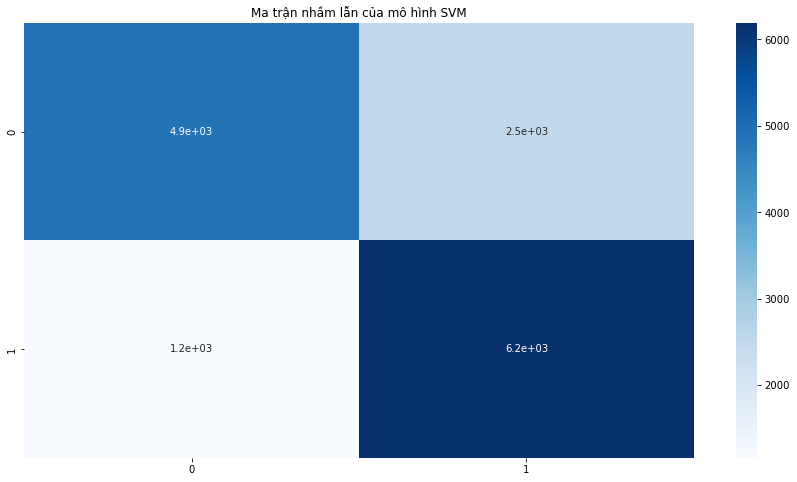

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Ma trận nhầm lẫn của mô hình SVM")
sns.heatmap(confusion_matrix(y_test.values, y_pre_SVC), cmap="Blues", annot=True)
plt.show()

## train naives bayes model

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(X_train,y_train)
y_pre_nai=naive.predict(X_test)

In [ ]:
print("accuracy_score: ", accuracy_score(y_test.values, y_pre_nai))
print("f1_score: ",f1_score(y_test.values, y_pre_nai))
print(classification_report(y_test.values, y_pre_nai))
print(confusion_matrix(y_test.values, y_pre_nai))

accuracy_score:  0.7053995387328721
f1_score:  0.7719132398508483
              precision    recall  f1-score   support

           0       1.00      0.41      0.58      7393
           1       0.63      1.00      0.77      7349

    accuracy                           0.71     14742
   macro avg       0.81      0.71      0.68     14742
weighted avg       0.81      0.71      0.68     14742

[[3050 4343]
 [   0 7349]]


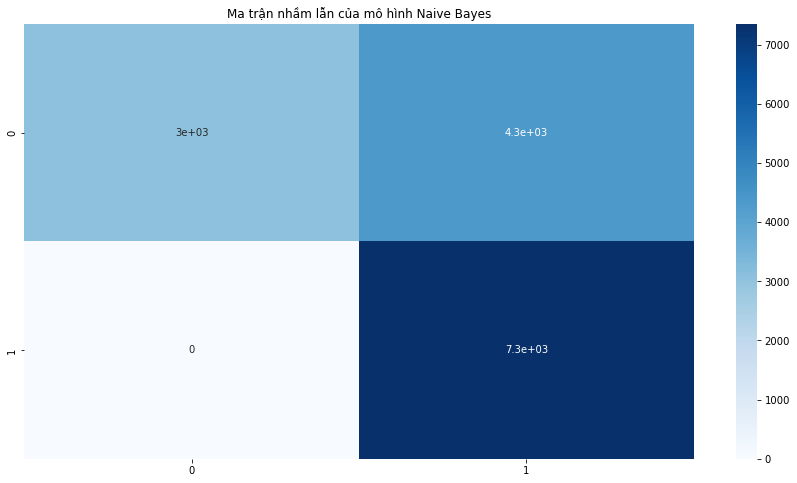

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Ma trận nhầm lẫn của mô hình Naive Bayes")
sns.heatmap(confusion_matrix(y_test.values, y_pre_nai), cmap="Blues", annot=True)
plt.show()

## train Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
y_pre_rf = rfc.predict(X_test)

print("accuracy_score: ", accuracy_score(y_test, y_pre_rf))
print("f1_score: ",f1_score(y_test, y_pre_rf))
print(classification_report(y_test, y_pre_rf))
print(confusion_matrix(y_test, y_pre_rf))

In [ ]:
print("accuracy_score: ", accuracy_score(y_test.values, y_pre_rf))
print("f1_score: ",f1_score(y_test.values, y_pre_rf))
print(classification_report(y_test.values, y_pre_rf))
print(confusion_matrix(y_test.values, y_pre_rf))

accuracy_score:  0.7518654185320852
f1_score:  0.7719451371571072
              precision    recall  f1-score   support

           0       0.81      0.66      0.73      7393
           1       0.71      0.84      0.77      7349

    accuracy                           0.75     14742
   macro avg       0.76      0.75      0.75     14742
weighted avg       0.76      0.75      0.75     14742

[[4893 2500]
 [1158 6191]]


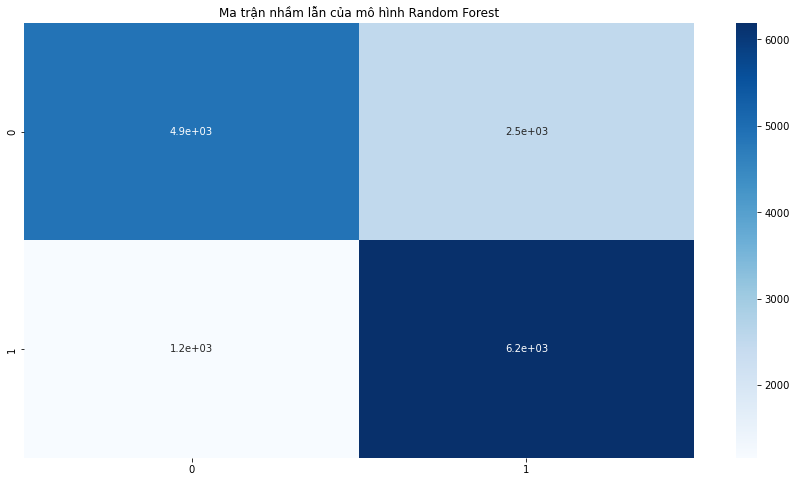

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Ma trận nhầm lẫn của mô hình Random Forest")
sns.heatmap(confusion_matrix(y_test.values, y_pre_rf), cmap="Blues", annot=True)
plt.show()